In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.svm import SVC


from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
cd /gdrive/My\ Drive

/gdrive/My Drive


In [0]:
cd data

/gdrive/My Drive/data


In [0]:
df_test = pd.read_csv('plasticc_train_lightcurves.csv')
# df_train_2 = pd.read_csv('plasticc_test_lightcurves_02.csv')
# df_train_3 = pd.read_csv('plasticc_test_lightcurves_03.csv')
# df_train_4 = pd.read_csv('plasticc_test_lightcurves_04.csv')

In [0]:
df_train_f = pd.read_csv('plasticc_train_metadata.csv')
df_test_f = pd.read_csv('plasticc_test_metadata.csv')

In [0]:
passband_ind = np.arange(6)
passnand = ['u','g','r','i', 'z', 'y']

In [0]:
df = df_test
print('minimun time is:',np.min(df['mjd']),'maximum time is:',np.max(df['mjd']),'Difference:',np.max(df['mjd'])-np.min(df['mjd']))

minimun time is: 59580.0343 maximum time is: 60674.363 Difference: 1094.3286999999982


In [0]:
L = []
for i in passband_ind:
    a = len(df[df['passband']==i])
    L.append(a)

Text(0, 0.5, 'Abundance')

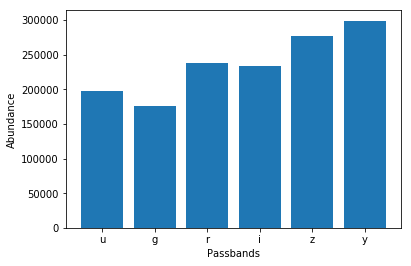

In [0]:
plt.bar(passnand,L)
plt.xlabel('Passbands')
plt.ylabel('Abundance')

In [0]:
mdf = df_test_f
df_train_f.columns

Index(['object_id', 'ra', 'decl', 'ddf_bool', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target',
       'true_target', 'true_submodel', 'true_z', 'true_distmod',
       'true_lensdmu', 'true_vpec', 'true_rv', 'true_av', 'true_peakmjd',
       'libid_cadence', 'tflux_u', 'tflux_g', 'tflux_r', 'tflux_i', 'tflux_z',
       'tflux_y'],
      dtype='object')

In [0]:
print('The fraction of data belongs to DDF component is:',len(mdf[mdf['ddf_bool']==1])/len(mdf)*100)

The fraction of data belongs to DDF component is: 26.962283384301735


In [0]:
target = np.unique(df_['target'])
target_m = np.arange(14)

In [0]:
T = []
for i in target:
    a = len(mdf[mdf['target']==i])
    T.append(a)
T

[151, 495, 924, 1193, 183, 30, 484, 102, 981, 208, 370, 2313, 239, 175]

Text(0, 0.5, 'Abundance')

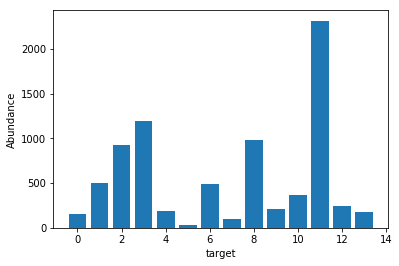

In [0]:
plt.bar(target_m,T)
plt.xlabel('target')
plt.ylabel('Abundance')


In [0]:
df_test.describe()

,object_id,mjd,passband,flux,flux_err,detected_bool
count,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06
mean,3.392608e+07,6.017921e+04,2.783108e+00,2.468855e+01,2.548932e+01,1.666168e-01
std,4.258439e+07,3.092379e+02,1.703946e+00,3.684506e+03,3.814492e+03,3.726336e-01
min,6.150000e+02,5.958003e+04,0.000000e+00,-1.149388e+06,4.637530e-01,0.000000e+00
25%,1.843400e+05,5.989905e+04,1.000000e+00,-2.789418e+00,2.118670e+00,0.000000e+00
50%,4.548783e+06,6.019331e+04,3.000000e+00,7.331990e-01,4.708105e+00,0.000000e+00
75%,6.796280e+07,6.048722e+04,4.000000e+00,8.830932e+00,1.297371e+01,0.000000e+00
max,1.307798e+08,6.067436e+04,5.000000e+00,2.432809e+06,2.234069e+06,1.000000e+00


In [0]:
df_train_2.describe()

,object_id,mjd,passband,flux,flux_err,detected_bool
count,4.428170e+07,4.428170e+07,4.428170e+07,4.428170e+07,4.428170e+07,4.428170e+07
mean,7.479532e+06,6.017872e+04,3.091652e+00,5.398831e+00,4.908339e+01,9.868579e-02
std,3.743296e+06,3.016194e+02,1.622233e+00,5.327350e+03,7.416885e+03,2.982397e-01
min,1.000183e+06,5.958003e+04,0.000000e+00,-6.868854e+06,7.330290e-01,0.000000e+00
25%,4.233340e+06,5.992322e+04,2.000000e+00,-5.538018e+00,4.889009e+00,0.000000e+00
50%,7.488128e+06,6.016918e+04,3.000000e+00,1.250389e+00,1.084365e+01,0.000000e+00
75%,1.072364e+07,6.046009e+04,5.000000e+00,1.182523e+01,2.229544e+01,0.000000e+00
max,1.395242e+07,6.067436e+04,5.000000e+00,6.431427e+06,7.313836e+06,1.000000e+00


In [0]:
df_train_3.describe()

,object_id,mjd,passband,flux,flux_err,detected_bool
count,4.427131e+07,4.427131e+07,4.427131e+07,4.427131e+07,4.427131e+07,4.427131e+07
mean,2.046240e+07,6.017865e+04,3.091470e+00,6.361866e+00,4.419619e+01,9.721008e-02
std,3.757505e+06,3.015522e+02,1.622148e+00,4.746228e+03,6.467377e+03,2.962436e-01
min,1.395243e+07,5.958003e+04,0.000000e+00,-8.935484e+06,7.330290e-01,0.000000e+00
25%,1.720620e+07,5.992332e+04,2.000000e+00,-5.515295e+00,4.882795e+00,0.000000e+00
50%,2.046596e+07,6.016912e+04,3.000000e+00,1.247302e+00,1.082615e+01,0.000000e+00
75%,2.372070e+07,6.046004e+04,5.000000e+00,1.177534e+01,2.224974e+01,0.000000e+00
max,2.695680e+07,6.067436e+04,5.000000e+00,5.060856e+06,1.000572e+07,1.000000e+00


In [0]:
df_train_4.describe()

,object_id,mjd,passband,flux,flux_err,detected_bool
count,4.430497e+07,4.430497e+07,4.430497e+07,4.430497e+07,4.430497e+07,4.430497e+07
mean,3.345174e+07,6.017881e+04,3.092051e+00,3.977530e+00,4.645122e+01,9.792549e-02
std,3.749995e+06,3.016708e+02,1.622282e+00,5.238709e+03,6.744822e+03,2.972139e-01
min,2.695681e+07,5.958003e+04,0.000000e+00,-7.356760e+06,7.330290e-01,0.000000e+00
25%,3.020078e+07,5.992323e+04,2.000000e+00,-5.526724e+00,4.884298e+00,0.000000e+00
50%,3.345614e+07,6.017513e+04,3.000000e+00,1.246972e+00,1.083418e+01,0.000000e+00
75%,3.670321e+07,6.046014e+04,5.000000e+00,1.179324e+01,2.227697e+01,0.000000e+00
max,3.993383e+07,6.067436e+04,5.000000e+00,9.585644e+06,8.885888e+06,1.000000e+00


In [0]:
df_test_f.describe;

(array([2.543e+03, 7.770e+02, 9.100e+02, 8.480e+02, 7.610e+02, 5.480e+02,
        3.890e+02, 2.680e+02, 1.790e+02, 1.210e+02, 8.800e+01, 6.800e+01,
        4.600e+01, 3.200e+01, 3.500e+01, 1.300e+01, 2.100e+01, 2.000e+01,
        1.300e+01, 1.100e+01, 1.100e+01, 1.600e+01, 1.600e+01, 1.500e+01,
        1.400e+01, 1.200e+01, 1.400e+01, 5.000e+00, 6.000e+00, 8.000e+00,
        1.100e+01, 8.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([0.    , 0.0689, 0.1378, 0.2067, 0.2756, 0.3445, 0.4134, 0.4823,
        0.5512, 0.6201, 0.689 , 0.7579, 0.8268, 0.8957, 0.9646, 1.0335,
        1.1024, 1.1713, 1.2402, 1.3091, 1.378 , 1.4469, 1.5158, 1.5847,
        1.6536, 1.7225, 1.7914, 1.8603, 1.9292, 1.9981, 2.067 , 2.1359,
        2.2048, 2.2737, 2.3426, 2.4115, 2.4804, 2.5493, 2.6182, 2.6871,
        2.756 , 

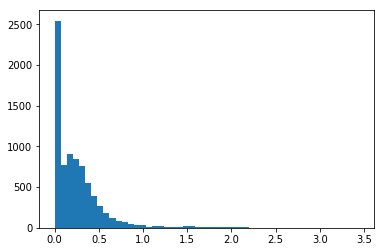

In [0]:
b = df_train_f['hostgal_specz']
plt.hist(b,50)

(array([398254.,  58951., 103672., 197831., 250220., 253920., 275744.,
        296680., 279240., 278888., 240200., 194616., 162925., 124572.,
         90552.,  60136.,  31595.,  16144.,  10383.,   8552.,   7840.,
          6773.,   6936.,   6566.,   6907.,   6318.,   5179.,   4785.,
          3679.,   2803.,   2266.,   2138.,   2223.,   2239.,   3320.,
          4305.,   3800.,   4092.,   6343.,   6464.,   7338.,   8360.,
          8215.,   7570.,   7030.,   6166.,   6059.,   4740.,   4597.,
          4764.]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
        1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92,
        1.98, 2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58,
        2.64, 2.7 , 2.76, 2.82, 2.88, 2.94, 3.  ]),
 <a list of 50 Patch objects>)

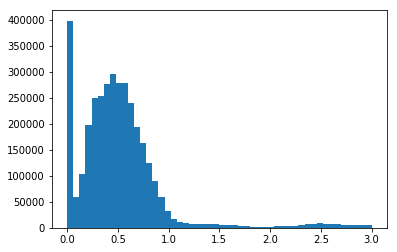

In [0]:
a = df_test_f['hostgal_photoz']
plt.hist(a,50)